Step 1.Importing Required Modules

In [114]:
!python -m pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/e9/7b/cd671c5067a56e1b4a9b70d0e42ac8cdb9f63acdc186589827cf213802a5/mediapipe-0.10.9-cp311-cp311-win_amd64.whl.metadata
  Using cached mediapipe-0.10.9-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Using cached mediapipe-0.10.9-cp311-cp311-win_amd64.whl (50.5 MB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Bat_Sheva\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is one of the most popular Python packages used for data visualization.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

# OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
# cv2.imshow() method is used to display an image in a window.
import cv2
import re
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Step 2. Understanding the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1)
from sklearn.utils import shuffle           
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tqdm import tqdm
from IPython.display import FileLink

In [12]:
labels=list()
path='./Dataset/'
for i in os.listdir(path):
    labels.append(i)
print(labels)

['Adho Mukha Svanasana', 'Adho Mukha Vrksasana', 'Alanasana', 'Anjaneyasana', 'Ardha Chandrasana', 'Ardha Matsyendrasana', 'Ardha Navasana', 'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 'Baddha Konasana', 'Bakasana', 'Balasana', 'Bitilasana', 'Camatkarasana', 'Dhanurasana', 'Eka Pada Rajakapotasana', 'Garudasana', 'Halasana', 'Hanumanasana', 'Malasana', 'Marjaryasana', 'Navasana', 'Padmasana', 'Parsva Virabhadrasana', 'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha Mayurasana', 'Poses.json', 'Salamba Bhujangasana', 'Salamba Sarvangasana', 'Setu Bandha Sarvangasana', 'Sivasana', 'Supta Kapotasana', 'Trikonasana', 'Upavistha Konasana', 'Urdhva Dhanurasana', 'Urdhva Mukha Svsnssana', 'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita Hasta Padangusthasana', 'Utthita Parsvakonasana', 'Vasisthasana', 'Virabhadrasana One', 'Virabhadrasana Three', 'Virabhadrasana Two', 'Vrksasana']


In [16]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :Adho Mukha Svanasana= 74
Length of :Adho Mukha Vrksasana= 65
Length of :Alanasana= 18
Length of :Anjaneyasana= 71
Length of :Ardha Chandrasana= 59
Length of :Ardha Matsyendrasana= 96
Length of :Ardha Navasana= 13
Length of :Ardha Pincha Mayurasana= 54
Length of :Ashta Chandrasana= 12
Length of :Baddha Konasana= 81
Length of :Bakasana= 84
Length of :Balasana= 79
Length of :Bitilasana= 94
Length of :Camatkarasana= 62
Length of :Dhanurasana= 54
Length of :Eka Pada Rajakapotasana= 53
Length of :Garudasana= 85
Length of :Halasana= 71
Length of :Hanumanasana= 41
Length of :Malasana= 73
Length of :Marjaryasana= 56
Length of :Navasana= 18
Length of :Padmasana= 77
Length of :Parsva Virabhadrasana= 14
Length of :Parsvottanasana= 43
Length of :Paschimottanasana= 62
Length of :Phalakasana= 66
Length of :Pincha Mayurasana= 43
Length of :Salamba Bhujangasana= 62
Length of :Salamba Sarvangasana= 73
Length of :Setu Bandha Sarvangasana= 66
Length of :Sivasana= 20
Length of :Supta Kapotasana=

In [6]:
# # פונקציה להמרת תמונה לשחור לבן
# def convert_to_grayscale(input_path, output_path):
#     image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
#     cv2.imwrite(output_path, image)

# # פונקציה לעבוד על תיקיית dataset ולהפעיל את הפונקציה על כל תמונה
# def convert_dataset_to_grayscale(dataset_path, output_path):
#     # יצירת תיקיית יצירת פלט אם אין כזו
#     if not os.path.exists(output_path):
#         os.makedirs(output_path)

#     # מעבר על כל קובץ בתיקיית ה-dataset
#     for root, dirs, files in os.walk(dataset_path):
#         for file in files:
#             input_path = os.path.join(root, file)
#             output_subfolder = os.path.relpath(root, dataset_path)
#             output_folder = os.path.join(output_path, output_subfolder)

#             # יצירת תת-תיקייה בתיקיית הפלט אם אין כזו
#             if not os.path.exists(output_folder):
#                 os.makedirs(output_folder)

#             # השימוש ב-os.path.join כדי ליצור את הנתיב בצורה יותר יציבה
#             output_path = os.path.join(output_folder, file)
#             convert_to_grayscale(input_path, output_path)


# output_path = "./black_white/"
# convert_dataset_to_grayscale(path, output_path)

In [22]:
path = './Dataset/'
print('Total No of yoga poses in the dataset is:', len(os.listdir(path)))
posses_in_var = os.listdir(path)
no_of_posses = len(os.listdir(path))
no_of_posses

Total No of yoga poses in the dataset is: 47


47

In [23]:
import os
from tqdm import tqdm
path = './Dataset/'
classes = os.listdir(path)
class_names_label = {class_name:i for i, class_name in enumerate(classes)}
labels = []
for folder in os.listdir(path):
    label = class_names_label[folder]
    for file in tqdm(os.listdir(os.path.join(path, folder))):
        labels.append(label)
labels

100%|██████████| 68/68 [00:00<?, ?it/s]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [24]:
posses_in_var

['Adho Mukha Svanasana',
 'Adho Mukha Vrksasana',
 'Alanasana',
 'Anjaneyasana',
 'Ardha Chandrasana',
 'Ardha Matsyendrasana',
 'Ardha Navasana',
 'Ardha Pincha Mayurasana',
 'Ashta Chandrasana',
 'Baddha Konasana',
 'Bakasana',
 'Balasana',
 'Bitilasana',
 'Camatkarasana',
 'Dhanurasana',
 'Eka Pada Rajakapotasana',
 'Garudasana',
 'Halasana',
 'Hanumanasana',
 'Malasana',
 'Marjaryasana',
 'Navasana',
 'Padmasana',
 'Parsva Virabhadrasana',
 'Parsvottanasana',
 'Paschimottanasana',
 'Phalakasana',
 'Pincha Mayurasana',
 'Salamba Bhujangasana',
 'Salamba Sarvangasana',
 'Setu Bandha Sarvangasana',
 'Sivasana',
 'Supta Kapotasana',
 'Trikonasana',
 'Upavistha Konasana',
 'Urdhva Dhanurasana',
 'Urdhva Mukha Svsnssana',
 'Ustrasana',
 'Utkatasana',
 'Uttanasana',
 'Utthita Hasta Padangusthasana',
 'Utthita Parsvakonasana',
 'Vasisthasana',
 'Virabhadrasana One',
 'Virabhadrasana Three',
 'Virabhadrasana Two',
 'Vrksasana']

In [25]:
no_of_images = []
for i in range(no_of_posses):
    comp_path = path + posses_in_var[i]
    no_of_images.append(len(os.listdir(comp_path)))
no_of_images

[74,
 65,
 18,
 71,
 59,
 96,
 13,
 54,
 12,
 81,
 84,
 79,
 94,
 62,
 54,
 53,
 85,
 71,
 41,
 73,
 56,
 18,
 77,
 14,
 43,
 62,
 66,
 43,
 62,
 73,
 66,
 20,
 13,
 23,
 17,
 74,
 69,
 96,
 81,
 71,
 64,
 69,
 80,
 64,
 69,
 61,
 68]

In [26]:
print('Total No of images:', sum(no_of_images))


Total No of images: 2758


<BarContainer object of 47 artists>

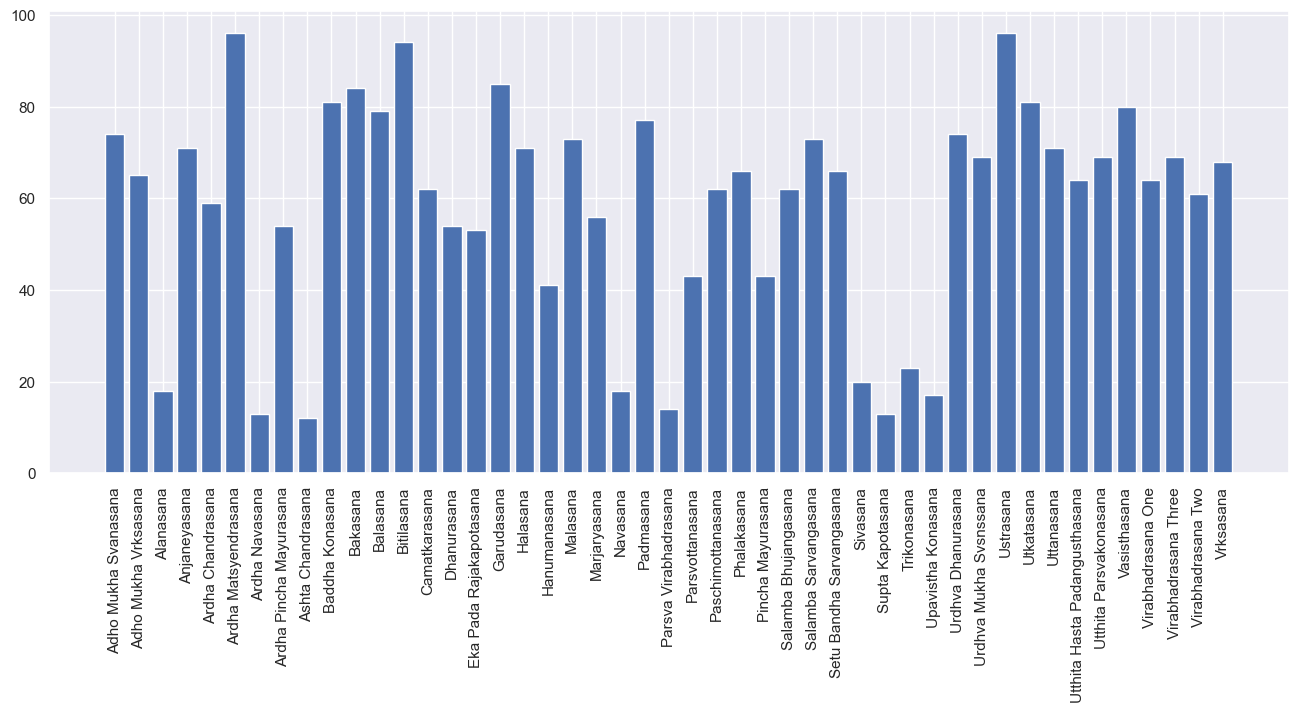

In [27]:
plt.figure(figsize = (16,6))
plt.xticks(rotation = 90)
plt.bar(posses_in_var, no_of_images)


Step 3.Importing the Images from datset folder

In [28]:
images = []
asanas_name = []
images_path = []
images_pixels = []
labels = []
d = {}

i=0
dataset_path = 'Dataset'

In [29]:

for directory in os.listdir(dataset_path):
    asanas_name.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):  
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)
        
    i = i+1
    
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total Postures: ", len(asanas_name))
print("Total images_pixels: ", len(images_pixels))
labels

Total images:  2756
Total images path:  2756
Total Postures:  47
Total images_pixels:  2756


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


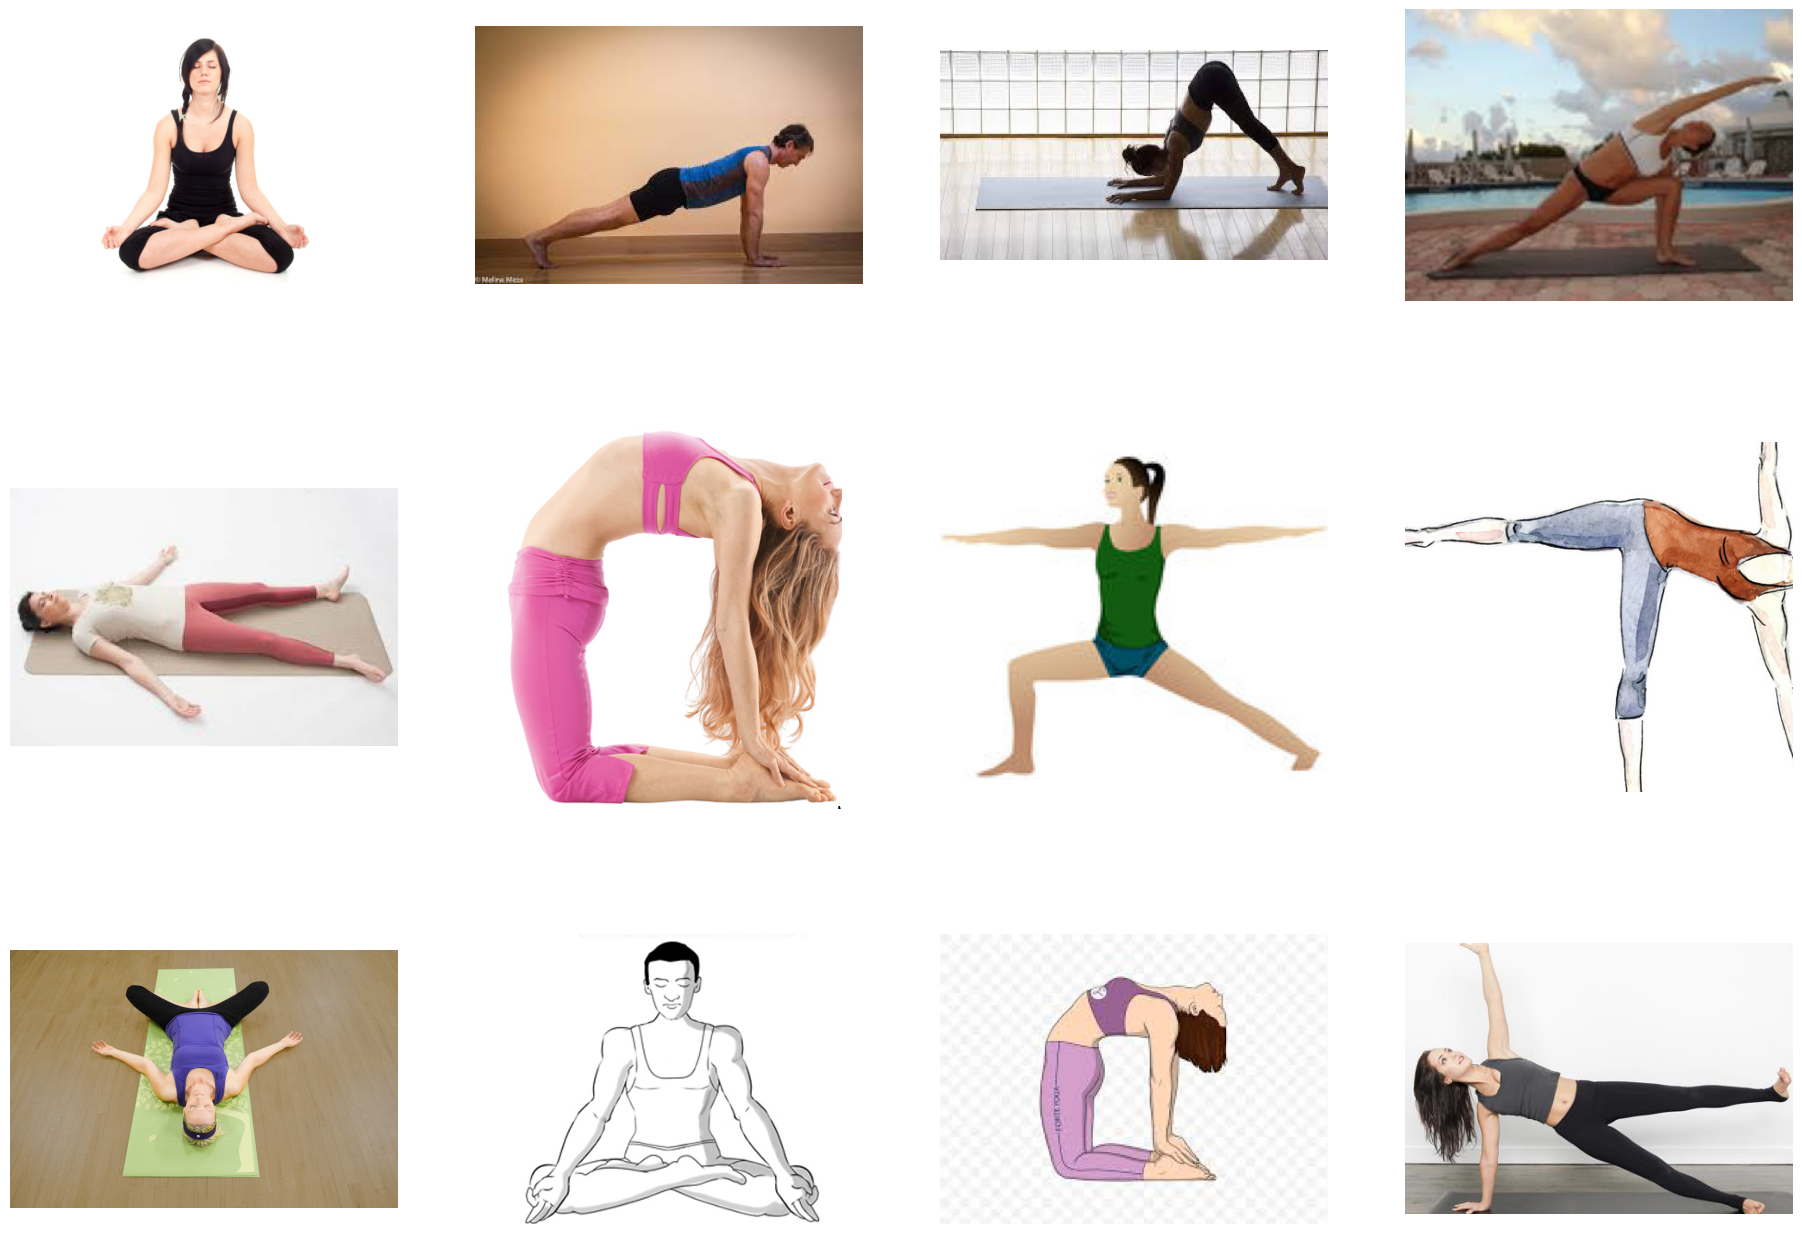

In [30]:
fig = plt.gcf()
fig.set_size_inches(23, 23)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [31]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)
labels_data



(7,
 0,
 20,
 37,
 26,
 3,
 25,
 3,
 30,
 37,
 4,
 44,
 35,
 13,
 14,
 22,
 3,
 9,
 5,
 9,
 0,
 27,
 9,
 41,
 45,
 28,
 0,
 46,
 38,
 36,
 3,
 5,
 26,
 10,
 46,
 14,
 25,
 30,
 3,
 7,
 38,
 39,
 1,
 5,
 11,
 20,
 15,
 10,
 22,
 44,
 0,
 24,
 3,
 14,
 5,
 45,
 19,
 34,
 13,
 17,
 11,
 42,
 34,
 37,
 7,
 20,
 44,
 15,
 1,
 38,
 12,
 15,
 28,
 14,
 18,
 13,
 4,
 12,
 44,
 46,
 42,
 16,
 5,
 1,
 40,
 13,
 40,
 17,
 1,
 42,
 10,
 5,
 22,
 33,
 38,
 16,
 32,
 44,
 4,
 19,
 36,
 29,
 16,
 36,
 28,
 23,
 29,
 38,
 0,
 3,
 11,
 25,
 5,
 39,
 40,
 17,
 40,
 7,
 22,
 29,
 43,
 36,
 15,
 25,
 40,
 20,
 22,
 19,
 34,
 14,
 29,
 9,
 19,
 38,
 5,
 3,
 17,
 45,
 7,
 0,
 1,
 14,
 40,
 11,
 24,
 29,
 38,
 36,
 25,
 12,
 3,
 25,
 38,
 12,
 18,
 43,
 10,
 16,
 10,
 9,
 38,
 29,
 20,
 7,
 42,
 29,
 16,
 29,
 22,
 20,
 29,
 27,
 35,
 31,
 14,
 31,
 37,
 19,
 25,
 43,
 22,
 41,
 16,
 17,
 17,
 11,
 42,
 34,
 4,
 37,
 41,
 6,
 43,
 7,
 14,
 46,
 4,
 5,
 37,
 34,
 42,
 3,
 11,
 41,
 43,
 30,
 3,
 16,
 11,
 22,

Step 4.Scaling and Splitting the data into Train and Validation

In [33]:
X_data = np.array(train_data)/255
Y_data =  to_categorical(labels_data, num_classes = no_of_posses)

In [34]:
#Splitting the Data into Training and Validation.
# 80-20 split.

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.2, random_state=50)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  2204
X label data :  552
Y test data :  2204
Y label data :  552


In [35]:
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_val.shape
X_test2 = X_val.reshape((nsamples,nx*ny*nrgb))

## Step 5.Building the Models


Parameters:
1) criterion - “gini”, “entropy”, “log_loss” default=”gini”
The function to measure the quality of a split.

2) min_samples_split - default=2
The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction.

3) max_features - int, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split.

If int, then consider max_features features at each split.

If float, then max_features is a fraction of features are considered at each split.

If “auto”, then max_features = sqrt(n_features).

If “sqrt”, then max_features = sqrt(n_features).

If “log2”, then max_features = log2(n_features).

If None, then max_features = n_features.

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',
                             min_samples_split=2, 
                             max_features='sqrt')
dtc.fit(X_train2,Y_train)

DecisionTreeClassifier(max_features='sqrt')

In [37]:
y_pred_dtc=dtc.predict(X_test2)
y_pred_dtc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
print(accuracy_score(y_pred_dtc,Y_val))
print(classification_report(y_pred_dtc,Y_val))

0.13768115942028986
              precision    recall  f1-score   support

           0       0.06      0.09      0.07        11
           1       0.00      0.00      0.00        21
           2       0.33      0.50      0.40         2
           3       0.07      0.07      0.07        14
           4       0.09      0.08      0.09        12
           5       0.24      0.18      0.21        22
           6       0.00      0.00      0.00         1
           7       0.11      0.08      0.10        12
           8       0.00      0.00      0.00         2
           9       0.29      0.22      0.25        18
          10       0.25      0.31      0.28        13
          11       0.00      0.00      0.00        14
          12       0.25      0.25      0.25        20
          13       0.06      0.17      0.09         6
          14       0.00      0.00      0.00         6
          15       0.12      0.06      0.08        18
          16       0.38      0.20      0.26        25
       

## Model 2- Random Forest Classifier:

Parameters:
1) n_neighbors - int, default=5
Number of neighbors to use by default for kneighbors queries.

2) metric - str or callable, default=’minkowski’
Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2.

3) pint, default=2.
Power parameter for the Minkowski metric.
When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
For arbitrary p, minkowski_distance (l_p) is use

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [41]:
knn.fit(X_train2,Y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn=knn.predict(X_test2)
y_pred_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
print(accuracy_score(y_pred_knn,Y_val))
print(classification_report(y_pred_knn,Y_val))

0.17753623188405798
              precision    recall  f1-score   support

           0       0.11      1.00      0.20         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.21      0.75      0.33         4
           4       0.09      0.50      0.15         2
           5       0.24      1.00      0.38         4
           6       0.00      0.00      0.00         0
           7       0.11      1.00      0.20         1
           8       0.00      0.00      0.00         0
           9       0.14      0.67      0.24         3
          10       0.12      1.00      0.22         2
          11       0.15      0.60      0.24         5
          12       0.40      0.67      0.50        12
          13       0.06      0.50      0.11         2
          14       0.22      1.00      0.36         2
          15       0.25      1.00      0.40         2
          16       0.23      1.00      0.38         3
       

## Model 4 : CNN-1

CNN with 1 Convolutional Layer:
This CNN takes as input tensors of shape (image_height, image_width, image_channels).

In this case,CNN will process inputs of size (100, 100, 3), which is the format of the Yoga images.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters. Here I choose the pooling with size 2 x 2.
h size

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 30% of the neurons.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.

I do a 10-way classification (as there are 10 classes of yoga images), using a final layer with 10 outputs and a softmax activation.

Softmax activation enables me to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

When compiling the model, I choose categorical_crossentropy as the loss function (which is relevent for multiclass, single-label classification problem) and Adam optimizer.

The cross-entropy loss calculates the error rate between the predicted value and the original value. Categorical is used because there are 10 classes to predict from. If there were 2 classes, I would have used binary_crossentropy.

The Adam optimizer is an improvement over SGD(Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. That is how a neural network learns. 2 x 2.

In [57]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.saving import save_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))

cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(no_of_posses, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 76832)             0         
                                                                 
 dense_6 (Dense)             (None, 47)                3611151   
                                                                 
Total params: 3612047 (13.78 MB)
Trainable params: 3612047 (13.78 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [58]:
history1 = cnn1.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/25
9/9 [==============================] - 4s 304ms/step - loss: 21.2648 - accuracy: 0.0472 - val_loss: 21.8775 - val_accuracy: 0.0471
Epoch 2/25
9/9 [==============================] - 2s 261ms/step - loss: 16.2141 - accuracy: 0.0685 - val_loss: 10.6924 - val_accuracy: 0.0942
Epoch 3/25
9/9 [==============================] - 2s 262ms/step - loss: 6.9862 - accuracy: 0.1062 - val_loss: 5.9697 - val_accuracy: 0.1123
Epoch 4/25
9/9 [==============================] - 2s 272ms/step - loss: 4.0154 - accuracy: 0.1874 - val_loss: 3.4386 - val_accuracy: 0.1793
Epoch 5/25
9/9 [==============================] - 2s 252ms/step - loss: 2.7598 - accuracy: 0.3280 - val_loss: 2.9537 - val_accuracy: 0.3098
Epoch 6/25
9/9 [==============================] - 2s 257ms/step - loss: 2.2540 - accuracy: 0.4936 - val_loss: 2.7759 - val_accuracy: 0.3406
Epoch 7/25
9/9 [==============================] - 2s 251ms/step - loss: 2.0007 - accuracy: 0.5712 - val_loss: 2.6412 - val_accuracy: 0.3931
Epoch 8/25
9/9 [

In [59]:
score1 = cnn1.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
# cnn1.save('cnn1.h5')

model_json = cnn1.to_json()
with open("cnn1.json", "w") as json_file:
    json_file.write(model_json)
cnn1.save_weights("cnn1_weights.h5")


Test loss: 2.1971864700317383
Test accuracy: 0.5181159377098083


<Figure size 640x480 with 0 Axes>

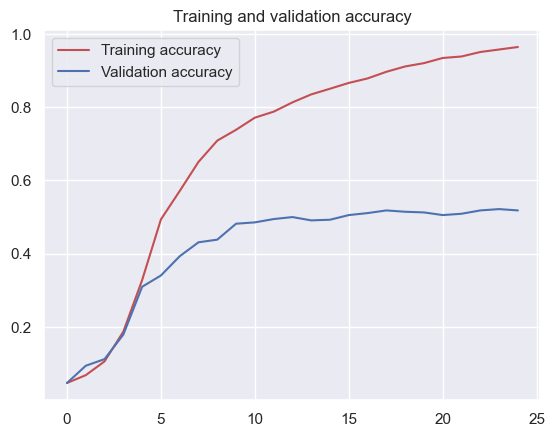

<Figure size 640x480 with 0 Axes>

In [60]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

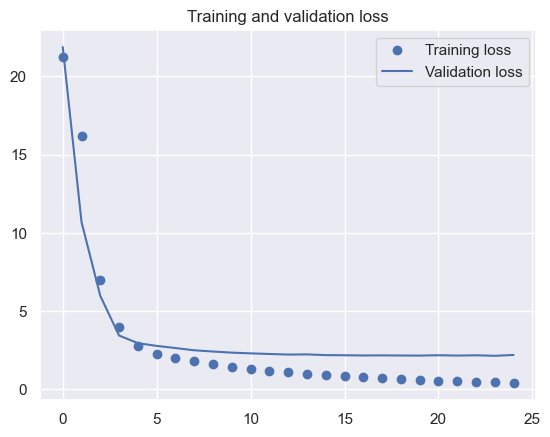

In [61]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model CNN-2

CNN with 3 Convolutional Layers - LeakyRelu Activation Function
We configure the CNN to process inputs of size (100, 100, 3), which is the format of the Yoga posture images.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature.

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique.

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the outputs.

I repeat these steps to add more hidden layers: 2 Conv2D layers,2 LeakyReLU layers with alpha(learning rate) = 0.01.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers.

I do a 10-way classification,using a final layer with 10 outputs and a softmax activation.
Softmax activation enables to calculate the output based on the probabilities.

The cross-entropy loss calculates the error rate between the predicted value and the original value.

The Adam optimizer is an improvement over Stochastic Gradient Descent. The optimizer is responsible for updating the weights of the neurons via backpropagation

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [65]:
cnn2 = Sequential()

cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn2.add(MaxPooling2D((2, 2)))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(Dropout(0.2))

cnn2.add(LeakyReLU(alpha=0.01))
cnn2.add(Dropout(0.2))

cnn2.add(Flatten())

cnn2.add(Dense(no_of_posses, activation='softmax'))

In [66]:
cnn2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 32)       

In [67]:
history2 = cnn2.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/25
9/9 [==============================] - 4s 325ms/step - loss: 3.9009 - accuracy: 0.0431 - val_loss: 3.6192 - val_accuracy: 0.1069
Epoch 2/25
9/9 [==============================] - 2s 274ms/step - loss: 3.3766 - accuracy: 0.2255 - val_loss: 3.2092 - val_accuracy: 0.2862
Epoch 3/25
9/9 [==============================] - 3s 284ms/step - loss: 2.8621 - accuracy: 0.4306 - val_loss: 2.8800 - val_accuracy: 0.3841
Epoch 4/25
9/9 [==============================] - 2s 274ms/step - loss: 2.3350 - accuracy: 0.5758 - val_loss: 2.5310 - val_accuracy: 0.4312
Epoch 5/25
9/9 [==============================] - 2s 252ms/step - loss: 1.9388 - accuracy: 0.6075 - val_loss: 2.3348 - val_accuracy: 0.4638
Epoch 6/25
9/9 [==============================] - 2s 251ms/step - loss: 1.6309 - accuracy: 0.6620 - val_loss: 2.1446 - val_accuracy: 0.5000
Epoch 7/25
9/9 [==============================] - 2s 246ms/step - loss: 1.3961 - accuracy: 0.7064 - val_loss: 2.0559 - val_accuracy: 0.5254
Epoch 8/25
9/9 [====

Test loss: 2.018772840499878
Test accuracy: 0.554347813129425


<Figure size 640x480 with 0 Axes>

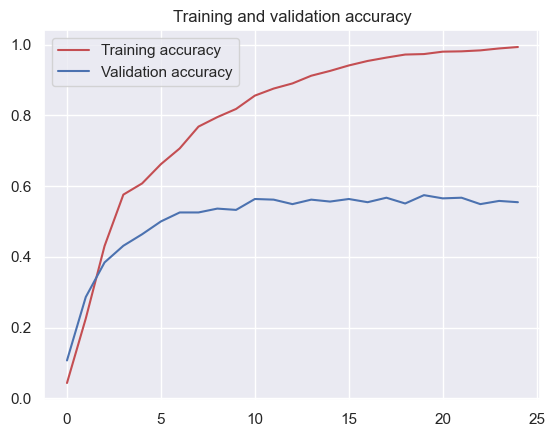

<Figure size 640x480 with 0 Axes>

In [68]:
score1 = cnn2.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
cnn2.save('cnn2.h5')

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

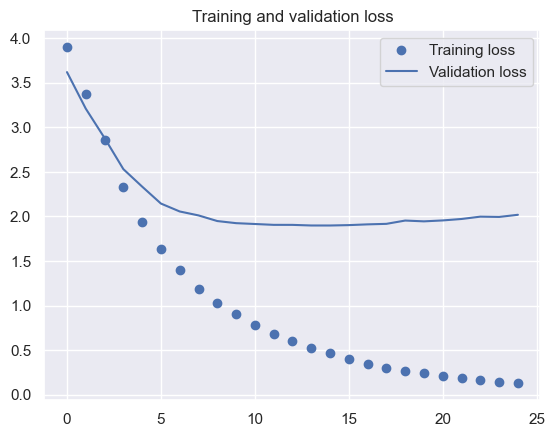

In [69]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### RELU vs LeakyRELU

ReLU: The derivative of the ReLU is 1 in the positive part, and 0 in the negative part.
LReLU: The derivative of the LReLU is 1 in the positive part, and is a small fraction in the negative part.
With a Leaky ReLU (LReLU), you won’t face the “dead ReLU” problem which happens when your ReLU always have values under 0. If the derivative of the slope of the ReLU is of 0, absolutely no learning is performed on the layers below the dead ReLU, because 0 will be multiplied to the accumulated gradient for the weight update. Thus, you can have dead neurons. This problem doesn’t happen with LReLU. In the ReLU case, you can end up with a neural network that never learns if the neurons are not activated at the start. You may have lots of dead ReLU without even knowing. However, ReLU computes faster and can introduce a sort of “optimal brain damage” regularization in your machine learning algorithm


## Model CNN-3

### CNN - Relu Activation Function

In this case, I configure the CNN to process inputs of size (100, 100, 3), which is the format of the Yoga posture images.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.

The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature.

To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique.

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the outputs.

I repeat these steps to add more hidden layers: 2 Conv2D layers, 1 MaxPooling2D layers, and 2 Dropout layers.

The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. We do a 10-way classification,using a final layer with 10 outputs and a softmax activation.
Softmax activation enables to calculate the output based on the probabilities.

The cross-entropy loss calculates the error rate between the predicted value and the original value.

The Adam optimizer is an improvement over Stochastic Gradient Descent. The optimizer is responsible for updating the weights of the neurons via backpropagation

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [75]:
cnn3 = Sequential()

cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn3.add(MaxPooling2D((2, 2)))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Flatten())


cnn3.add(Dense(no_of_posses, activation='softmax'))

In [76]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 21, 21, 128)      

In [77]:
history3 = cnn3.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score3 = cnn3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/25
9/9 [==============================] - 9s 759ms/step - loss: 3.8570 - accuracy: 0.0358 - val_loss: 3.7741 - val_accuracy: 0.0199
Epoch 2/25
9/9 [==============================] - 13s 2s/step - loss: 3.7370 - accuracy: 0.0526 - val_loss: 3.6065 - val_accuracy: 0.1250
Epoch 3/25
9/9 [==============================] - 16s 2s/step - loss: 3.3068 - accuracy: 0.1928 - val_loss: 3.0590 - val_accuracy: 0.2536
Epoch 4/25
9/9 [==============================] - 16s 2s/step - loss: 2.5485 - accuracy: 0.3666 - val_loss: 2.4661 - val_accuracy: 0.3804
Epoch 5/25
9/9 [==============================] - 15s 2s/step - loss: 1.9262 - accuracy: 0.5018 - val_loss: 2.3088 - val_accuracy: 0.4620
Epoch 6/25
9/9 [==============================] - 16s 2s/step - loss: 1.4684 - accuracy: 0.6216 - val_loss: 2.4351 - val_accuracy: 0.4855
Epoch 7/25
9/9 [==============================] - 9s 891ms/step - loss: 1.0458 - accuracy: 0.7269 - val_loss: 2.7005 - val_accuracy: 0.4873
Epoch 8/25
9/9 [==============

KeyboardInterrupt: 

In [74]:
from tensorflow.keras.models import load_model
score1 = cnn3.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
cnn3.save('cnn3.h5')

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

ValueError: in user code:

    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Bat_Sheva\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 47) and (None, 10) are incompatible


## Model CNN-4

### CNN - Tanh Activation Function

In [78]:
cnn5 = Sequential()

cnn5.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn5.add(MaxPooling2D((2, 2)))

cnn5.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
cnn5.add(MaxPooling2D(pool_size=(2, 2)))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
cnn5.add(Dropout(0.2))

cnn5.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
cnn5.add(Dropout(0.2))

cnn5.add(Flatten())


cnn5.add(Dense(no_of_posses, activation='softmax'))

In [79]:
cnn5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 128)     

In [80]:
history5 = cnn5.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score5 = cnn5.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Epoch 1/25
9/9 [==============================] - 8s 714ms/step - loss: 4.4662 - accuracy: 0.0672 - val_loss: 3.3837 - val_accuracy: 0.1504
Epoch 2/25
9/9 [==============================] - 6s 675ms/step - loss: 2.9010 - accuracy: 0.2695 - val_loss: 2.6038 - val_accuracy: 0.3931
Epoch 3/25
9/9 [==============================] - 6s 672ms/step - loss: 2.1996 - accuracy: 0.4515 - val_loss: 2.3128 - val_accuracy: 0.4348
Epoch 4/25
9/9 [==============================] - 6s 662ms/step - loss: 1.7520 - accuracy: 0.5667 - val_loss: 2.1544 - val_accuracy: 0.4764
Epoch 5/25
9/9 [==============================] - 6s 716ms/step - loss: 1.3866 - accuracy: 0.6447 - val_loss: 2.1686 - val_accuracy: 0.4946
Epoch 6/25
9/9 [==============================] - 6s 714ms/step - loss: 1.0829 - accuracy: 0.7282 - val_loss: 2.2576 - val_accuracy: 0.4837
Epoch 7/25
9/9 [==============================] - 6s 699ms/step - loss: 0.8104 - accuracy: 0.7949 - val_loss: 2.4055 - val_accuracy: 0.4710
Epoch 8/25
9/9 [====

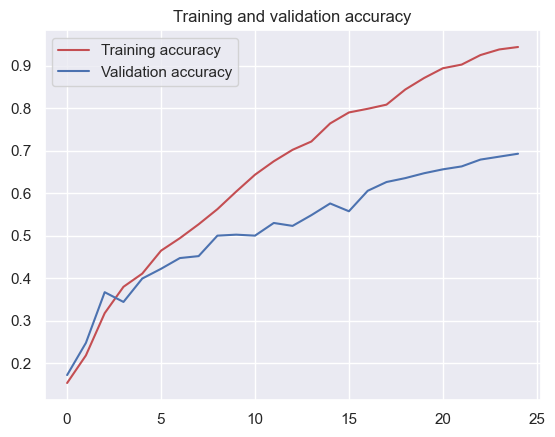

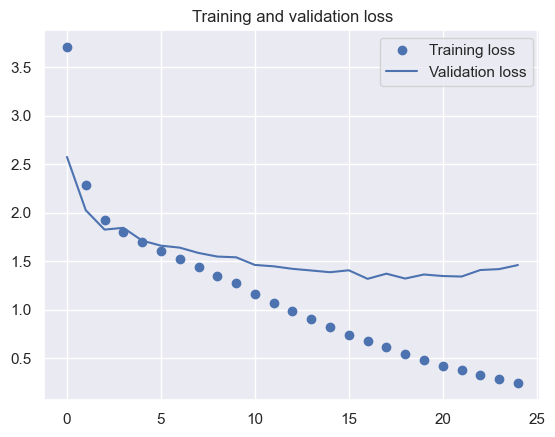

In [46]:
cnn5.save('cnn5.h5')
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model CNN-5

### CNN - Tanh Activation Function

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [85]:
cnn6 = Sequential()

cnn6.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn6.add(MaxPooling2D((2, 2)))

cnn6.add(Conv2D(74, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(MaxPooling2D(pool_size=(2, 2)))
cnn6.add(Dropout(0.2))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(Dropout(0.2))

cnn6.add(Conv2D(128, kernel_size=(3, 3), activation='sigmoid'))
cnn6.add(Dropout(0.2))

cnn6.add(Flatten())


cnn6.add(Dense(no_of_posses, activation='softmax'))

In [86]:
cnn6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 23, 23, 74)        0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 23, 23, 74)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 21, 21, 128)     

In [87]:
history6 = cnn6.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score6 = cnn6.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Epoch 1/25
9/9 [==============================] - 10s 871ms/step - loss: 10.6609 - accuracy: 0.0213 - val_loss: 3.8318 - val_accuracy: 0.0254
Epoch 2/25
9/9 [==============================] - 7s 732ms/step - loss: 3.8456 - accuracy: 0.0281 - val_loss: 3.8487 - val_accuracy: 0.0399
Epoch 3/25
9/9 [==============================] - 8s 878ms/step - loss: 3.8482 - accuracy: 0.0299 - val_loss: 3.8473 - val_accuracy: 0.0362
Epoch 4/25
9/9 [==============================] - 9s 980ms/step - loss: 3.8467 - accuracy: 0.0336 - val_loss: 3.8455 - val_accuracy: 0.0362
Epoch 5/25
9/9 [==============================] - 8s 906ms/step - loss: 3.8450 - accuracy: 0.0336 - val_loss: 3.8436 - val_accuracy: 0.0362
Epoch 6/25
9/9 [==============================] - 8s 905ms/step - loss: 3.8433 - accuracy: 0.0336 - val_loss: 3.8418 - val_accuracy: 0.0362
Epoch 7/25
8/9 [=========================>....] - ETA: 1s - loss: 3.8416 - accuracy: 0.0288

KeyboardInterrupt: 

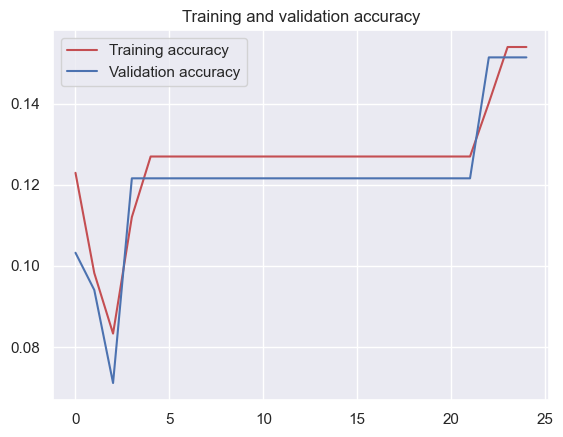

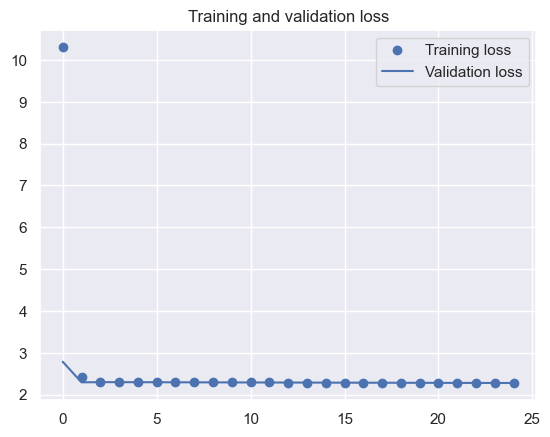

In [51]:
cnn6.save('cnn6.h5')
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model CNN-6

### CNN - Elu Activation Function

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [89]:
cnn7 = Sequential()

cnn7.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn7.add(MaxPooling2D((2, 2)))

cnn7.add(Conv2D(74, kernel_size=(3, 3), activation='elu'))
cnn7.add(MaxPooling2D(pool_size=(2, 2)))
cnn7.add(Dropout(0.2))

cnn7.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
cnn7.add(Dropout(0.2))

cnn7.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
cnn7.add(Dropout(0.2))

cnn7.add(Flatten())


cnn7.add(Dense(no_of_posses, activation='softmax'))

In [90]:
cnn7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 23, 23, 74)        0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 23, 23, 74)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 128)     

In [91]:
history7 = cnn7.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score7 = cnn7.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Epoch 1/25
9/9 [==============================] - 12s 1s/step - loss: 4.6129 - accuracy: 0.0485 - val_loss: 3.5948 - val_accuracy: 0.1178
Epoch 2/25
9/9 [==============================] - 18s 2s/step - loss: 3.0868 - accuracy: 0.2541 - val_loss: 2.7112 - val_accuracy: 0.3279
Epoch 3/25
9/9 [==============================] - 18s 2s/step - loss: 2.2390 - accuracy: 0.4333 - val_loss: 2.4445 - val_accuracy: 0.4167
Epoch 4/25
9/9 [==============================] - 20s 2s/step - loss: 1.7561 - accuracy: 0.5585 - val_loss: 2.1823 - val_accuracy: 0.4783
Epoch 5/25
9/9 [==============================] - 19s 2s/step - loss: 1.3964 - accuracy: 0.6511 - val_loss: 2.2137 - val_accuracy: 0.4946
Epoch 6/25
9/9 [==============================] - 20s 2s/step - loss: 1.1021 - accuracy: 0.7264 - val_loss: 2.2641 - val_accuracy: 0.5109
Epoch 7/25
9/9 [==============================] - 20s 2s/step - loss: 0.8166 - accuracy: 0.7872 - val_loss: 2.4174 - val_accuracy: 0.4873
Epoch 8/25
9/9 [==================

KeyboardInterrupt: 

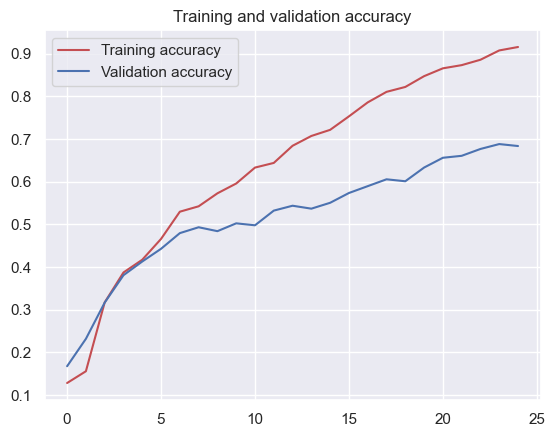

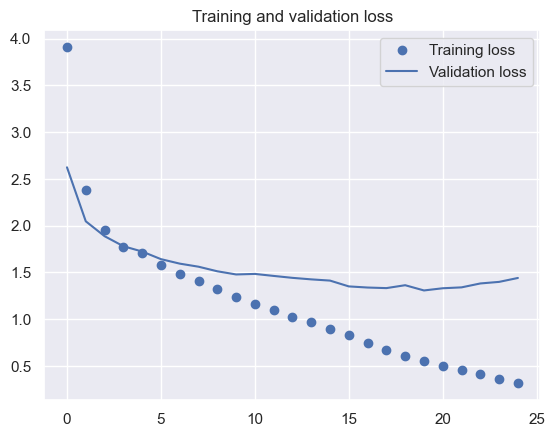

In [56]:
cnn7.save('cnn7.h5')
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model CNN-7

### CNN - Custom Activation Function

### ReLU^1.21525

In [57]:

from keras import backend as K
from keras.layers import Activation
from keras.utils import get_custom_objects
from keras.layers import Lambda

def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [58]:
cnn8 = Sequential()

cnn8.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn8.add(MaxPooling2D((2, 2)))

cnn8.add(Activation(custom_activation, name='SpecialActivation'))
cnn8.add(MaxPooling2D(pool_size=(2, 2)))
cnn8.add(Dropout(0.2))

cnn8.add(Activation(custom_activation, name='SpecialActivation1'))
cnn8.add(Dropout(0.2))

cnn8.add(Activation(custom_activation, name='SpecialActivation11'))
cnn8.add(Dropout(0.2))

cnn8.add(Flatten())

cnn8.add(Dense(10, activation='softmax'))

In [59]:
cnn8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 SpecialActivation (Activat  (None, 49, 49, 32)        0         
 ion)                                                            
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                      

In [60]:
history8 = cnn8.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score8 = cnn8.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Epoch 1/25
7/7 [==============================] - 5s 625ms/step - loss: 2.2230 - accuracy: 0.1499 - val_loss: 2.1699 - val_accuracy: 0.1995
Epoch 2/25
7/7 [==============================] - 4s 559ms/step - loss: 2.1067 - accuracy: 0.2464 - val_loss: 2.0720 - val_accuracy: 0.2982
Epoch 3/25
7/7 [==============================] - 4s 564ms/step - loss: 1.9876 - accuracy: 0.3320 - val_loss: 2.0097 - val_accuracy: 0.2959
Epoch 4/25
7/7 [==============================] - 4s 561ms/step - loss: 1.8555 - accuracy: 0.3871 - val_loss: 1.9100 - val_accuracy: 0.4037
Epoch 5/25
7/7 [==============================] - 4s 581ms/step - loss: 1.7181 - accuracy: 0.4566 - val_loss: 1.7854 - val_accuracy: 0.4541
Epoch 6/25
7/7 [==============================] - 4s 579ms/step - loss: 1.5672 - accuracy: 0.5146 - val_loss: 1.6959 - val_accuracy: 0.4312
Epoch 7/25
7/7 [==============================] - 4s 571ms/step - loss: 1.4531 - accuracy: 0.5313 - val_loss: 1.6723 - val_accuracy: 0.4312
Epoch 8/25
7/7 [====

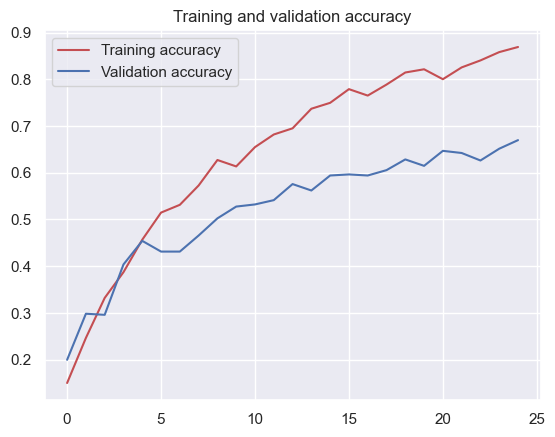

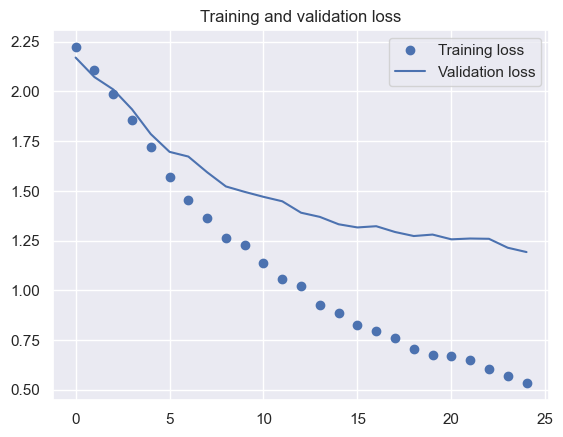

In [61]:
cnn8.save('cnn8.h5')
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [62]:
import matplotlib.pyplot as plt

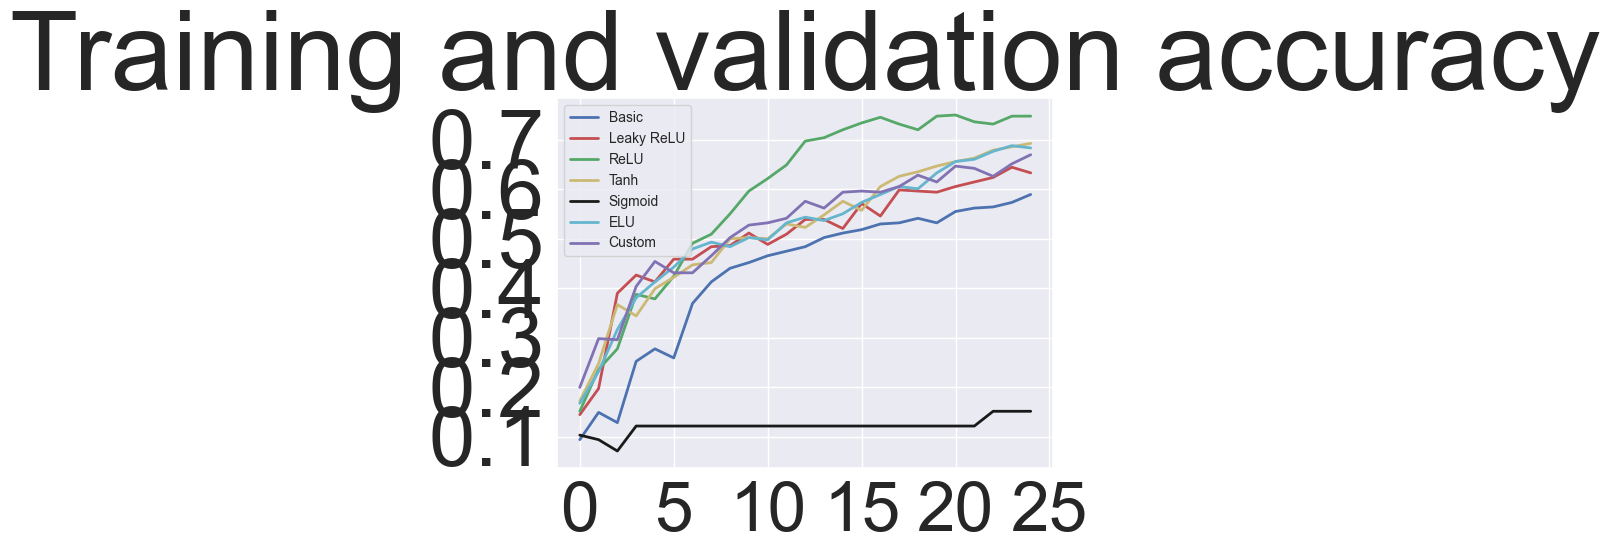

In [63]:
val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']
val_acc4 = history5.history['val_accuracy']
val_acc5 = history6.history['val_accuracy']
val_acc6 = history7.history['val_accuracy']
val_acc7 = history8.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, val_acc1, 'b', linewidth=2,label='Basic')
plt.plot(epochs, val_acc2, 'r', linewidth=2,label='Leaky ReLU')
plt.plot(epochs, val_acc3, 'g', linewidth=2,label='ReLU')
plt.plot(epochs, val_acc4, 'y', linewidth=2,label='Tanh')
plt.plot(epochs, val_acc5, 'k', linewidth=2,label='Sigmoid')
plt.plot(epochs, val_acc6, 'c', linewidth=2,label='ELU')
plt.plot(epochs, val_acc7, 'm', linewidth=2,label='Custom')
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.title('Training and validation accuracy',fontsize=80)
plt.legend(loc=0)
plt.legend(fontsize=10) # using a size in points
plt.show()

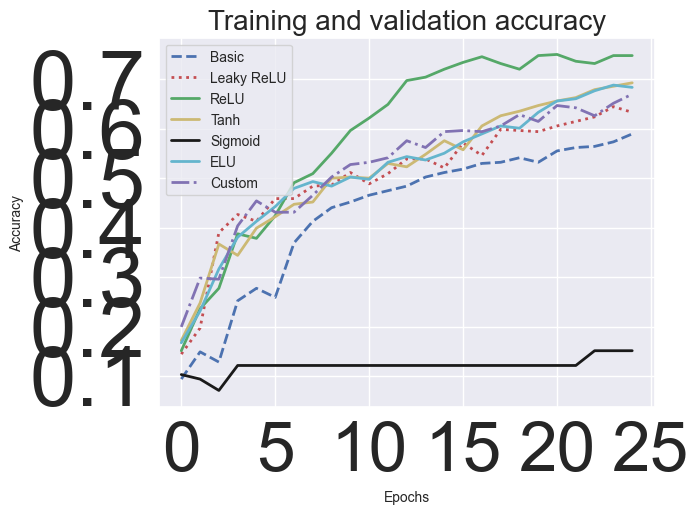

In [64]:
val_acc1 = history1.history['val_accuracy']
val_acc2 = history2.history['val_accuracy']
val_acc3 = history3.history['val_accuracy']
val_acc4 = history5.history['val_accuracy']
val_acc5 = history6.history['val_accuracy']
val_acc6 = history7.history['val_accuracy']
val_acc7 = history8.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, val_acc1, 'b',linestyle='dashed', linewidth=2,label='Basic')
plt.plot(epochs, val_acc2, 'r',linestyle='dotted', linewidth=2,label='Leaky ReLU')
plt.plot(epochs, val_acc3, 'g',linewidth=2,label='ReLU')
plt.plot(epochs, val_acc4, 'y', linewidth=2,label='Tanh')
plt.plot(epochs, val_acc5, 'k', linewidth=2,label='Sigmoid')
plt.plot(epochs, val_acc6, 'c', linewidth=2,label='ELU')
plt.plot(epochs, val_acc7, 'm',linestyle='dashdot', linewidth=2,label='Custom')
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.title('Training and validation accuracy',fontsize=20)
plt.legend(loc=0)
plt.legend(fontsize=10) # using a size in points
plt.axis('tight');
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.show()

In [65]:
cnn9 = Sequential()

cnn9.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn9.add(MaxPooling2D((2, 2)))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(MaxPooling2D(pool_size=(2, 2)))
cnn9.add(Dropout(0.2))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(Dropout(0.2))

cnn9.add(LeakyReLU(alpha=0.05))
cnn9.add(Dropout(0.2))

cnn9.add(Flatten())

cnn9.add(Dense(10, activation='softmax'))

In [66]:
cnn9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn9.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 24, 24, 32)       

In [67]:
history9 = cnn9.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn9.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])
cnn9.save('cnn9.h5')

Epoch 1/25


7/7 [==============================] - 4s 508ms/step - loss: 2.5771 - accuracy: 0.1246 - val_loss: 2.1559 - val_accuracy: 0.1972
Epoch 2/25
7/7 [==============================] - 3s 446ms/step - loss: 2.2001 - accuracy: 0.1614 - val_loss: 2.1371 - val_accuracy: 0.2179
Epoch 3/25
7/7 [==============================] - 3s 444ms/step - loss: 2.0156 - accuracy: 0.2820 - val_loss: 1.9778 - val_accuracy: 0.3165
Epoch 4/25
7/7 [==============================] - 3s 440ms/step - loss: 1.8703 - accuracy: 0.3860 - val_loss: 1.8850 - val_accuracy: 0.3417
Epoch 5/25
7/7 [==============================] - 3s 454ms/step - loss: 1.7465 - accuracy: 0.4446 - val_loss: 1.7867 - val_accuracy: 0.4197
Epoch 6/25
7/7 [==============================] - 3s 449ms/step - loss: 1.6231 - accuracy: 0.5055 - val_loss: 1.7199 - val_accuracy: 0.4472
Epoch 7/25
7/7 [==============================] - 3s 452ms/step - loss: 1.5160 - accuracy: 0.5629 - val_loss: 1.6686 - val_accuracy: 0.4450
Epoch 8/25
7/7 [===============

### LeakyReLU with different values of alpha:

In [68]:
cnn10 = Sequential()

cnn10.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn10.add(MaxPooling2D((2, 2)))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(MaxPooling2D(pool_size=(2, 2)))
cnn10.add(Dropout(0.2))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(Dropout(0.2))

cnn10.add(LeakyReLU(alpha=0.25))
cnn10.add(Dropout(0.2))

cnn10.add(Flatten())

cnn10.add(Dense(10, activation='softmax'))

In [69]:
cnn10.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 24, 24, 32)       

In [70]:
history10 = cnn10.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn10.evaluate(X_val, Y_val, verbose=0)

Epoch 1/25
7/7 [==============================] - 4s 526ms/step - loss: 2.5071 - accuracy: 0.1246 - val_loss: 2.2843 - val_accuracy: 0.0711
Epoch 2/25
7/7 [==============================] - 3s 455ms/step - loss: 2.1547 - accuracy: 0.1901 - val_loss: 2.0515 - val_accuracy: 0.2752
Epoch 3/25
7/7 [==============================] - 3s 457ms/step - loss: 1.9552 - accuracy: 0.3372 - val_loss: 1.9254 - val_accuracy: 0.3807
Epoch 4/25
7/7 [==============================] - 4s 544ms/step - loss: 1.8031 - accuracy: 0.4204 - val_loss: 1.8298 - val_accuracy: 0.3647
Epoch 5/25
7/7 [==============================] - 4s 592ms/step - loss: 1.6856 - accuracy: 0.4687 - val_loss: 1.7436 - val_accuracy: 0.4220
Epoch 6/25
7/7 [==============================] - 4s 531ms/step - loss: 1.5825 - accuracy: 0.5302 - val_loss: 1.7052 - val_accuracy: 0.3991
Epoch 7/25
7/7 [==============================] - 4s 524ms/step - loss: 1.4898 - accuracy: 0.5451 - val_loss: 1.6186 - val_accuracy: 0.4564
Epoch 8/25
7/7 [====

In [71]:
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])
cnn10.save('cnn10.h5')



Test loss: 1.1844704151153564
Test accuracy: 0.6582568883895874


In [72]:
cnn11 = Sequential()

cnn11.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn11.add(MaxPooling2D((2, 2)))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(MaxPooling2D(pool_size=(2, 2)))
cnn11.add(Dropout(0.2))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(Dropout(0.2))

cnn11.add(LeakyReLU(alpha=0.2))
cnn11.add(Dropout(0.2))

cnn11.add(Flatten())

cnn11.add(Dense(10, activation='softmax'))

In [73]:
cnn11.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)       

In [74]:
histor11 = cnn11.fit(X_train, Y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn11.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])
cnn11.save('cnn11.h5')

Epoch 1/25
7/7 [==============================] - 8s 912ms/step - loss: 3.1570 - accuracy: 0.0976 - val_loss: 2.3972 - val_accuracy: 0.1537
Epoch 2/25
7/7 [==============================] - 5s 739ms/step - loss: 2.3903 - accuracy: 0.1511 - val_loss: 2.2517 - val_accuracy: 0.1170
Epoch 3/25
7/7 [==============================] - 5s 744ms/step - loss: 2.1716 - accuracy: 0.1901 - val_loss: 2.0840 - val_accuracy: 0.2133
Epoch 4/25
7/7 [==============================] - 5s 730ms/step - loss: 1.9771 - accuracy: 0.2981 - val_loss: 1.9456 - val_accuracy: 0.3899
Epoch 5/25
7/7 [==============================] - 5s 656ms/step - loss: 1.8471 - accuracy: 0.3946 - val_loss: 1.8469 - val_accuracy: 0.3853
Epoch 6/25
7/7 [==============================] - 5s 683ms/step - loss: 1.7399 - accuracy: 0.4199 - val_loss: 1.7929 - val_accuracy: 0.4128
Epoch 7/25
7/7 [==============================] - 7s 1s/step - loss: 1.6375 - accuracy: 0.4951 - val_loss: 1.7175 - val_accuracy: 0.4128
Epoch 8/25
7/7 [=======

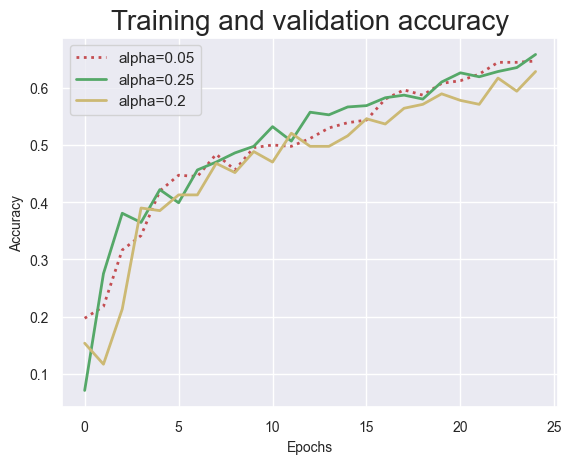

In [75]:

#val_acc1 = history2.history['val_accuracy']
val_acc2 = history9.history['val_accuracy']
val_acc3 = history10.history['val_accuracy']
val_acc4 = histor11.history['val_accuracy']


epochs = range(25)

#plt.plot(epochs, val_acc1, 'b',linestyle='dashed', linewidth=10,label='Basic')
plt.plot(epochs, val_acc2, 'r',linestyle='dotted', linewidth=2,label='alpha=0.05')
plt.plot(epochs, val_acc3, 'g',linewidth=2,label='alpha=0.25')
plt.plot(epochs, val_acc4, 'y', linewidth=2,label='alpha=0.2')

plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Training and validation accuracy',fontsize=20)
plt.legend(loc=0)
#plt.legend(fontsize=80) # using a size in points
plt.axis('tight');
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.show()

In [47]:
from keras import backend as K
from keras.saving import save_model
from keras.layers import Activation
from keras.utils import get_custom_objects
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.optimizers import Adam
def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

### CNN with ReLU + Custom Activation + Tanh

In [51]:


cnn12 = Sequential()

cnn12.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn12.add(MaxPooling2D((2, 2)))

cnn12.add(Conv2D(74, kernel_size=(3, 3), activation='relu'))
cnn12.add(MaxPooling2D(pool_size=(2, 2)))
cnn12.add(Dropout(0.2))

cnn12.add(Activation(custom_activation, name='SpecialActivation'))
cnn12.add(Dropout(0.2))

cnn12.add(Conv2D(74, kernel_size=(3, 3), activation='tanh'))
cnn12.add(Dropout(0.2))
###########################################################
cnn12.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn12.add(MaxPooling2D(pool_size=(2, 2)))
cnn12.add(Dropout(0.2))
cnn12.add(Dense(128, activation='relu'))
#######################################################3

cnn12.add(Flatten())

cnn12.add(Dense(no_of_posses, activation='softmax'))


In [52]:
cnn12.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# custom_optimizer = Adam(lr=0.01)  # ניתן לשנות את הערך של lr לקצב הלמידה הרצוי
# # custom_optimizer = Adam(lr=0.001)  # ניתן לשנות את הערך של lr לקצב הלמידה הרצוי

# cnn12.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=custom_optimizer,
#               metrics=['accuracy'])
cnn12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 74)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 74)        0         
                                                                 
 SpecialActivation (Activat  (None, 23, 23, 74)       

In [53]:
histor12 = cnn12.fit(X_train, Y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn12.evaluate(X_val, Y_val, verbose=0)


Epoch 1/30


9/9 [==============================] - 11s 815ms/step - loss: 3.8130 - accuracy: 0.0327 - val_loss: 3.7981 - val_accuracy: 0.0399
Epoch 2/30
9/9 [==============================] - 6s 667ms/step - loss: 3.7526 - accuracy: 0.0549 - val_loss: 3.7239 - val_accuracy: 0.0707
Epoch 3/30
9/9 [==============================] - 6s 670ms/step - loss: 3.6285 - accuracy: 0.1202 - val_loss: 3.3936 - val_accuracy: 0.2192
Epoch 4/30
9/9 [==============================] - 6s 640ms/step - loss: 3.0082 - accuracy: 0.2731 - val_loss: 2.8107 - val_accuracy: 0.3225
Epoch 5/30
9/9 [==============================] - 6s 648ms/step - loss: 2.4523 - accuracy: 0.3870 - val_loss: 2.4765 - val_accuracy: 0.4112
Epoch 6/30
9/9 [==============================] - 6s 658ms/step - loss: 1.9571 - accuracy: 0.4900 - val_loss: 2.3364 - val_accuracy: 0.4384
Epoch 7/30
9/9 [==============================] - 6s 652ms/step - loss: 1.5791 - accuracy: 0.5789 - val_loss: 2.3000 - val_accuracy: 0.4728
Epoch 8/30
9/9 [=

In [54]:
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])
model_json = cnn12.to_json()
with open("cnn12.json", "w") as json_file:
    json_file.write(model_json)
cnn12.save_weights("cnn12_weights.h5")

Test loss: 4.808063507080078
Test accuracy: 0.4836956560611725


### CNN with ReLU + Tanh + Custom Activation

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

In [41]:
from keras import backend as K
from keras.layers import Activation
from keras.utils import get_custom_objects
from keras.layers import Lambda

def custom_activation(x):
   return  K.relu(x)**1.2125
    
get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [42]:

cnn13 = Sequential()

cnn13.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100,100,3)))
cnn13.add(MaxPooling2D((2, 2)))

cnn13.add(Conv2D(74, kernel_size=(3, 3), activation='relu'))
cnn13.add(MaxPooling2D(pool_size=(2, 2)))
cnn13.add(Dropout(0.2))

cnn13.add(Conv2D(74, kernel_size=(3, 3), activation='tanh'))
cnn13.add(Dropout(0.2))

cnn13.add(Activation(custom_activation, name='SpecialActivation'))
cnn13.add(Dropout(0.2))

cnn13.add(Flatten())

cnn13.add(Dense(9, activation='softmax'))

In [43]:
cnn13.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn13.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 74)        21386     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 74)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 74)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 74)       

In [44]:
histor13 = cnn13.fit(X_train, Y_train,
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(X_val, Y_val))
score9 = cnn13.evaluate(X_val, Y_val, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])
cnn13.save('cnn13.h5')

Epoch 1/30
7/7 [==============================] - 6s 685ms/step - loss: 2.2457 - accuracy: 0.1407 - val_loss: 2.2087 - val_accuracy: 0.1468
Epoch 2/30
7/7 [==============================] - 4s 575ms/step - loss: 2.1706 - accuracy: 0.1551 - val_loss: 2.1715 - val_accuracy: 0.1720
Epoch 3/30
7/7 [==============================] - 4s 576ms/step - loss: 2.0894 - accuracy: 0.2372 - val_loss: 2.0462 - val_accuracy: 0.3257
Epoch 4/30
7/7 [==============================] - 4s 556ms/step - loss: 1.8752 - accuracy: 0.3670 - val_loss: 1.9267 - val_accuracy: 0.3142
Epoch 5/30
7/7 [==============================] - 4s 579ms/step - loss: 1.6870 - accuracy: 0.4342 - val_loss: 1.8371 - val_accuracy: 0.3739
Epoch 6/30
7/7 [==============================] - 4s 557ms/step - loss: 1.5285 - accuracy: 0.5020 - val_loss: 1.7861 - val_accuracy: 0.3968
Epoch 7/30
7/7 [==============================] - 4s 557ms/step - loss: 1.3744 - accuracy: 0.5612 - val_loss: 1.7209 - val_accuracy: 0.4404
Epoch 8/30
7/7 [====

In [1]:
acc = histor13.history['accuracy']
val_acc = histor13.history['val_accuracy']
loss = histor13.history['loss']
val_loss = histor13.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'histor13' is not defined

In [86]:
cnn13.save("cnn13.h5")

In [87]:
from PIL import Image
import numpy as np

image_path = './image.png'  # שינה לנתיב התמונה שלך
image = Image.open(image_path)
image = image.resize((100, 100))  # התאמת גודל לגודל הקלט של המודל
image_array = np.array(image)
image_array = image_array / 255.0  # התאמת הערכים לטווח [0, 1] או לטווח המתאים למודל שלך

# התאמת הבנייה של המערך לצורך בצע החיזוי
image_array = np.expand_dims(image_array, axis=0)


In [88]:
# from keras.models import load_model

# model = load_model('cnn13.h5')  # החלף 'my_model.h5' בשם הקובץ המכיל את המודל שלך


In [89]:
# from tensorflow.keras.models import load_model

# model_path = r'C:\Users\Bat_Sheva\מסמכים\תכנות\BlackOps\final\cnn13.h5'
# loaded_model = tf.keras.models.load_model('./cnn13.h5')
# model = load_model()